In [1]:
import pandas as pd
import numpy as np
import re
import pymysql
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']

# 数据预处理

In [42]:
#导入数据 一共有8个csv文件 将其合并
data_list=[]
for i in range(1,9):
    data=pd.read_csv(f'./bj_danke_{i}.csv')
    data_list.append(data)
data=pd.concat(data_list)

In [43]:
data.head() #查看前5条数据

,价格,面积,编号,户型,楼层,位置1,位置2,小区,地铁
0,1330.0,9.0,38738-A,3室1卫,9/11层,房山区,良乡大学城西,紫汇家园,地铁：距房山线良乡大学城西站550米
1,5810.0,39.0,64752-A,1室1卫,9/12层,东城区,广渠门内,绿景苑,地铁：距7号线广渠门内站650米
2,4820.0,36.0,65359-A,1室1卫,1/6层,东城区,景泰,定安里,地铁：距14号线东段景泰站450米
3,1850.0,9.0,185-B,4室2卫,2/27层,朝阳区,管庄,京通苑阳光华苑,地铁：距八通线管庄站500米
4,9000.0,116.0,17830-A,2室1卫,8/16层,朝阳区,十里堡,天天朝阳,地铁：距6号线十里堡站850米


In [44]:
#数据预处理
#查看数据基本信息
data.info()
#可以看出一共有6602条数据，共9列

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7697 entries, 0 to 848
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   价格      6602 non-null   object
 1   面积      6602 non-null   object
 2   编号      6602 non-null   object
 3   户型      6602 non-null   object
 4   楼层      6602 non-null   object
 5   位置1     6602 non-null   object
 6   位置2     6602 non-null   object
 7   小区      6602 non-null   object
 8   地铁      6602 non-null   object
dtypes: object(9)
memory usage: 601.3+ KB


In [45]:
#查看是否有缺失值
data.isnull().sum() 
#可以看出每列都有缺失值，接下来对缺失值进行处理

价格     1095
面积     1095
编号     1095
户型     1095
楼层     1095
位置1    1095
位置2    1095
小区     1095
地铁     1095
dtype: int64

In [46]:
data.dropna(axis=0,inplace=True)
data.reset_index(drop=True,inplace=True)
#删除重复值
data.drop_duplicates(inplace=True)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6025 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   价格      6025 non-null   object
 1   面积      6025 non-null   object
 2   编号      6025 non-null   object
 3   户型      6025 non-null   object
 4   楼层      6025 non-null   object
 5   位置1     6025 non-null   object
 6   位置2     6025 non-null   object
 7   小区      6025 non-null   object
 8   地铁      6025 non-null   object
dtypes: object(9)
memory usage: 470.7+ KB


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6025 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   价格      6025 non-null   object
 1   面积      6025 non-null   object
 2   编号      6025 non-null   object
 3   户型      6025 non-null   object
 4   楼层      6025 non-null   object
 5   位置1     6025 non-null   object
 6   位置2     6025 non-null   object
 7   小区      6025 non-null   object
 8   地铁      6025 non-null   object
dtypes: object(9)
memory usage: 470.7+ KB


In [50]:
#查看每列，看是否有异常值，对异常值进行处理
data['价格'].unique()
#其中有一个元素为'价格',将其所在行删掉，然后将数值类型转化为int类型
#可以看出价格列数据类型不同，将其转为int64型

array([1330.0, 5810.0, 4820.0, 1850.0, 9000.0, 1720.0, 1790.0, 5140.0,
       2260.0, 4400.0, 2700.0, 2320.0, 2590.0, 1470.0, 1860.0, 3440.0,
       7360.0, 1450.0, 1740.0, 2460.0, 5170.0, 1910.0, 1950.0, 5480.0,
       6100.0, 1800.0, 2140.0, 3420.0, 7010.0, 2160.0, 4260.0, 6790.0,
       8880.0, 4550.0, 2890.0, 1900.0, 8810.0, 11260.0, 9730.0, 8130.0,
       4150.0, 9680.0, 6530.0, 10550.0, 2970.0, 2200.0, 2180.0, 1260.0,
       2620.0, 7480.0, 2190.0, 7760.0, 9660.0, 1290.0, 1810.0, 3080.0,
       2350.0, 1490.0, 2580.0, 2490.0, 3960.0, 7460.0, 2440.0, 1660.0,
       1580.0, 1680.0, 2080.0, 3010.0, 2000.0, 2110.0, 3540.0, 1410.0,
       4770.0, 5630.0, 4690.0, 1380.0, 2520.0, 2560.0, 2020.0, 7580.0,
       5750.0, 2740.0, 2370.0, 1670.0, 2650.0, 6140.0, 4840.0, 1770.0,
       6340.0, 7300.0, 1110.0, 5010.0, 2530.0, 5070.0, 2290.0, 1930.0,
       1710.0, 2150.0, 1880.0, 2060.0, 5370.0, 3180.0, 2450.0, 2410.0,
       1460.0, 1170.0, 2070.0, 4360.0, 9120.0, 2380.0, 3820.0, 1540.0,
    

In [60]:
data.loc[data[data['价格']=='价格'].index]

,价格,面积,编号,户型,楼层,位置1,位置2,小区,地铁
1384,价格,面积,编号,户型,楼层,位置1,位置2,小区,地铁


In [70]:
#可以看出该行数据全为表头数字，很有可能导入数据时，将某一张表的表头作为数据再次导入
#将该列删除，然后将价格列其转为整数类型
data.drop(index=data[data['价格']=='价格'].index,axis=0,inplace=True)
data['价格']=data['价格'].astype(np.int64)

In [72]:
#查看面积列，再将其数值类型转化为整数
data['面积'].unique()
data['面积']=data['面积'].astype(np.int64)

In [75]:
#查看每列 看是否有异常值
data['户型'].unique()
data['楼层'].unique()
data['位置1'].unique()
data['位置2'].unique()
data['小区'].unique()
data['地铁'].unique()

array(['地铁：距房山线良乡大学城西站550米', '地铁：距7号线广渠门内站650米', '地铁：距14号线东段景泰站450米', ...,
       '地铁：距1号线,10号线国贸站450米', '地铁：距7号线广渠门内站400米', '地铁：距2号线,8号线鼓楼大街站750米'],
      dtype=object)

In [79]:
#将地铁列“地铁：”删除
data['地铁'].replace('地铁：','',inplace=True)
#增加列
#将楼层列分为所在楼层和总楼层
data['所在楼层']=data['楼层'].apply(lambda x:int(x.split('/')[0]))
data['总楼层']=data['楼层'].apply(lambda x:int(x.replace('层','').split('/')[-1]))
data['地铁数']=data['地铁'].apply(lambda x:len(re.findall('线',x)))
data['距离地铁路程']=data['地铁'].apply(lambda x:int(re.findall('(\d+)米',x)[-1]) if re.findall('(\d+)米',x) else -1)
data['距离地铁路程'] = data['距离地铁路程'].astype(np.int64)

In [81]:
#查看数据处理后结果
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6024 entries, 0 to 6573
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   价格      6024 non-null   int64 
 1   面积      6024 non-null   int64 
 2   编号      6024 non-null   object
 3   户型      6024 non-null   object
 4   楼层      6024 non-null   object
 5   位置1     6024 non-null   object
 6   位置2     6024 non-null   object
 7   小区      6024 non-null   object
 8   地铁      6024 non-null   object
 9   所在楼层    6024 non-null   int64 
 10  总楼层     6024 non-null   int64 
 11  地铁数     6024 non-null   int64 
 12  距离地铁路程  6024 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 658.9+ KB


,价格,面积,编号,户型,楼层,位置1,位置2,小区,地铁,所在楼层,总楼层,地铁数,距离地铁路程
0,1330,9,38738-A,3室1卫,9/11层,房山区,良乡大学城西,紫汇家园,地铁：距房山线良乡大学城西站550米,9,11,1,550
1,5810,39,64752-A,1室1卫,9/12层,东城区,广渠门内,绿景苑,地铁：距7号线广渠门内站650米,9,12,1,650
2,4820,36,65359-A,1室1卫,1/6层,东城区,景泰,定安里,地铁：距14号线东段景泰站450米,1,6,1,450
3,1850,9,185-B,4室2卫,2/27层,朝阳区,管庄,京通苑阳光华苑,地铁：距八通线管庄站500米,2,27,1,500
4,9000,116,17830-A,2室1卫,8/16层,朝阳区,十里堡,天天朝阳,地铁：距6号线十里堡站850米,8,16,1,850


In [83]:
#将数据保存到文件中
data.to_csv('bj_rent.csv',index=False,encoding='utf-8-sig')
#在数据库中创建表bj_rent,将保存的数据导入到表中

# 利用SQL语句分析数据并可视化

In [3]:
#连接数据库
conn=pymysql.connect(host='localhost',user='root',password='000109',database='test',charset='utf8')

1.查看整体情况，出租房数量、每平米租金、平均所在楼层高度、平均距离地铁路程

In [136]:
cur=conn.cursor()
cur.execute('select count(1),avg(面积),sum(价格)/sum(面积),avg(所在楼层),avg(距离地铁路程) from bj_rent')
data=cur.fetchall()
data

((6024,
  Decimal('15.6775'),
  Decimal('169.5788'),
  Decimal('7.1785'),
  Decimal('961.7427')),)

可以看出一共有6024条租房数据，平均租房面积为15.68平方米，每平米租房价格为169.58元，平均楼层为7楼，距离最近地铁的平均距离为961.74米

2.1 对地区进行数据分析

In [66]:
cur=conn.cursor()
cur.execute('select 位置1,count(1) as total,count(distinct 小区) as 小区数量,sum(价格)/sum(面积) as 每平米租金 from bj_rent group by 位置1 order by total desc')
data=cur.fetchall()
data

(('朝阳区', 1877, 498, Decimal('185.9424')),
 ('通州区', 1027, 252, Decimal('137.7378')),
 ('丰台区', 744, 280, Decimal('185.4459')),
 ('昌平区', 511, 154, Decimal('161.0673')),
 ('大兴区', 381, 151, Decimal('156.5199')),
 ('海淀区', 370, 172, Decimal('211.3776')),
 ('顺义区', 370, 64, Decimal('159.5459')),
 ('房山区', 363, 78, Decimal('117.8136')),
 ('石景山区', 175, 59, Decimal('176.2078')),
 ('东城区', 104, 65, Decimal('154.8466')),
 ('西城区', 84, 62, Decimal('184.0784')),
 ('门头沟区', 18, 6, Decimal('161.6940')))

可以看出朝阳区、通州区租房数量最多，西城区、门头沟区租房数量最少

2.2 地区分析可视化

In [67]:
data=pd.DataFrame(data,columns=['位置1','租房数','小区数','每平米租金'])
data

,位置1,租房数,小区数,每平米租金
0,朝阳区,1877,498,185.9424
1,通州区,1027,252,137.7378
2,丰台区,744,280,185.4459
3,昌平区,511,154,161.0673
4,大兴区,381,151,156.5199
5,海淀区,370,172,211.3776
6,顺义区,370,64,159.5459
7,房山区,363,78,117.8136
8,石景山区,175,59,176.2078
9,东城区,104,65,154.8466


Text(0.5, 1.0, '位置与租房数条形图')

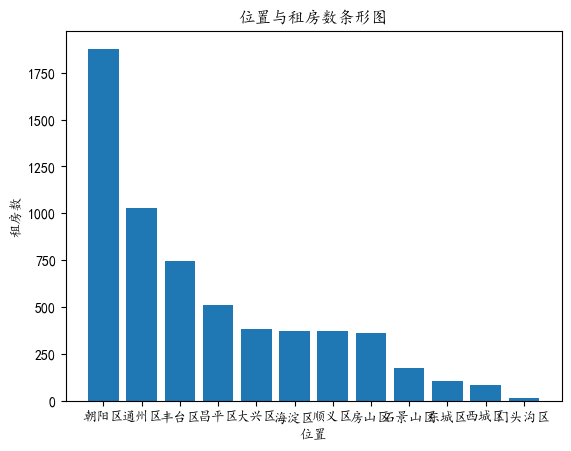

In [68]:
#根据位置和租房数绘制条形图
plt.bar(data['位置1'],data['租房数'])
plt.xlabel('位置')
plt.ylabel('租房数')
plt.title('位置与租房数条形图')

可以以看出朝阳区的租房数量最多，通州区的租房数量紧随其后，门头沟区租房数量最少,说明朝阳区和通州区的租赁市场比较活跃，人员和人口密度也比较大。

Text(0.5, 1.0, '位置与每平米租金线图')

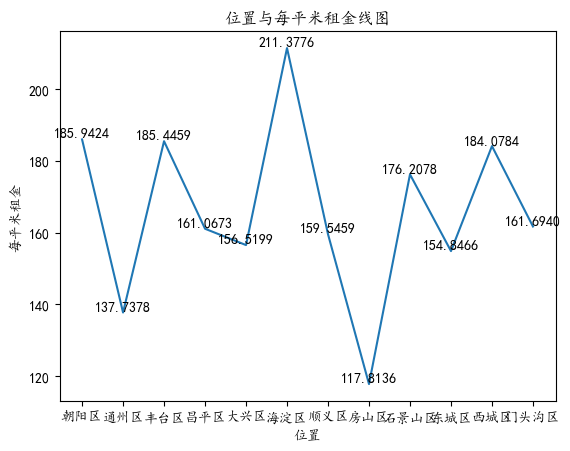

In [69]:
#根据位置和每平米租金绘制线图
plt.plot(data['位置1'],data['每平米租金'])
for x,y in zip(data['位置1'],data['每平米租金']):
     plt.text(x, y, y, ha='center', va='bottom', fontsize=10)
plt.xlabel('位置')
plt.ylabel('每平米租金')
plt.title('位置与每平米租金线图')

海淀区的每平米租金价格最贵，朝阳区排名第二，从上图可以看出每平米租金与房源数量无太大关系，通州区租房数量较多，每平米租金相对来说较少，是一个不错的租房地区选择。

3.1 小区数据分析

In [71]:
cur=conn.cursor()
cur.execute('select 小区,位置1,count(1) as total,sum(价格)/sum(面积) as 每平米租金 from bj_rent group by 小区,位置1 order by total desc')
data1=cur.fetchall()
data1

(('新建村小区', '通州区', 55, Decimal('213.8376')),
 ('花香东苑', '丰台区', 52, Decimal('226.8390')),
 ('连心园西区', '朝阳区', 52, Decimal('160.6913')),
 ('友谊嘉园三期', '海淀区', 48, Decimal('202.1027')),
 ('管庄新村', '朝阳区', 47, Decimal('184.8780')),
 ('常营民族家园CDF区', '朝阳区', 44, Decimal('173.4112')),
 ('东潞苑', '通州区', 36, Decimal('125.4953')),
 ('刘庄新村', '通州区', 34, Decimal('132.8507')),
 ('澜西园', '顺义区', 31, Decimal('135.7027')),
 ('西潞苑小区', '通州区', 27, Decimal('128.9514')),
 ('东羊庄新村', '房山区', 27, Decimal('118.1703')),
 ('姚家园东里7号院', '朝阳区', 26, Decimal('206.2029')),
 ('吉祥花园', '顺义区', 25, Decimal('204.0942')),
 ('北花园小区', '朝阳区', 24, Decimal('148.1559')),
 ('枫泉花园', '顺义区', 23, Decimal('226.0092')),
 ('德鑫嘉园三期', '丰台区', 22, Decimal('227.6498')),
 ('姚家园西里5号院', '朝阳区', 22, Decimal('161.8338')),
 ('泰福苑二区', '朝阳区', 21, Decimal('180.3067')),
 ('建工双合家园', '朝阳区', 21, Decimal('199.3927')),
 ('红山郡', '丰台区', 20, Decimal('138.7072')),
 ('三山新新家园', '顺义区', 20, Decimal('173.7156')),
 ('连心园东区', '朝阳区', 19, Decimal('161.0032')),
 ('富力惠兰美居', '通州区', 19, Decim

上述结果可知，新建村小区的租房数量最多，花香东苑、连心园西区租房数量也较多

In [72]:
cur=conn.cursor()
cur.execute('select 小区,位置1,count(1) as total,sum(价格)/sum(面积) as 每平米租金 from bj_rent group by 小区,位置1 order by 每平米租金 desc limit 10')
data2=cur.fetchall()
data2

(('半壁街南路1号院', '海淀区', 1, Decimal('596.0000')),
 ('交大东路56号院', '西城区', 1, Decimal('488.3333')),
 ('木星园', '朝阳区', 1, Decimal('468.5714')),
 ('吉庆里小区', '朝阳区', 1, Decimal('452.5000')),
 ('中关村三才堂', '海淀区', 1, Decimal('447.7778')),
 ('月季园（牡丹园）', '海淀区', 1, Decimal('446.2500')),
 ('双榆树北路', '海淀区', 1, Decimal('437.5000')),
 ('富力城', '朝阳区', 1, Decimal('432.8571')),
 ('国瑞城中区', '东城区', 2, Decimal('427.5000')),
 ('百万庄北里', '西城区', 1, Decimal('425.0000')))

以上是房租最贵的小区前10名，在海淀区的半壁街南路1号院小区最贵，达到596元每平米，是北京平均每平米租房价格169.58元的3倍多。在前10名小区中，海淀区、朝阳区的小区最多，也与上面分析海淀区、朝阳区房租最贵的结果相一致。

3.2 小区分析可视化

In [73]:
data2=pd.DataFrame(data2,columns=['小区','位置1','租房数','每平米租金'])
data2

,小区,位置1,租房数,每平米租金
0,半壁街南路1号院,海淀区,1,596.0000
1,交大东路56号院,西城区,1,488.3333
2,木星园,朝阳区,1,468.5714
3,吉庆里小区,朝阳区,1,452.5000
4,中关村三才堂,海淀区,1,447.7778
5,月季园（牡丹园）,海淀区,1,446.2500
6,双榆树北路,海淀区,1,437.5000
7,富力城,朝阳区,1,432.8571
8,国瑞城中区,东城区,2,427.5000
9,百万庄北里,西城区,1,425.0000


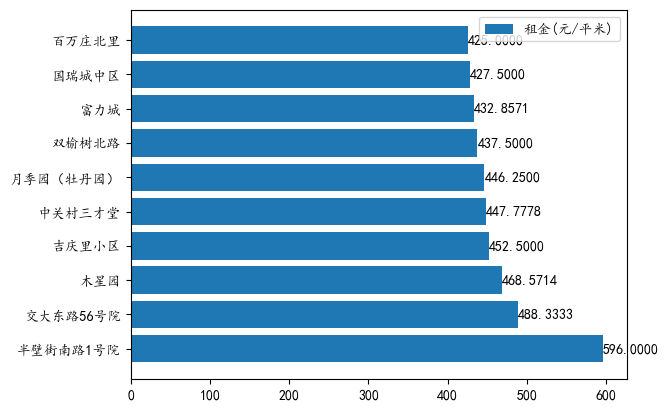

In [76]:
#小区与每平米租金前10名条形图
plt.barh(data2['小区'], data2['每平米租金'],label='租金(元/平米)')
for x, y in zip(data2['小区'], data2['每平米租金']):
    plt.text(y, x, y, ha='left', va='center', fontsize=10)
plt.legend()

以上是小区与每平米租金前10名条形图，可以看出前10名的租金都达到400元/平米以上，是平均数170元/平米的两倍多，最贵的租金为平均价格的三倍多。

4.1 户型楼层分析

In [117]:
#户型
cur=conn.cursor()
cur.execute('select 户型,count(1) as total,sum(价格)/sum(面积) as 每平米租金 from bj_rent group by 户型 order by total desc')
huxing=cur.fetchall()
huxing 

(('3室1卫', 2783, Decimal('193.0605')),
 ('4室1卫', 1487, Decimal('187.1849')),
 ('2室1卫', 966, Decimal('159.0482')),
 ('1室1卫', 315, Decimal('110.5262')),
 ('5室1卫', 178, Decimal('172.6687')),
 ('4室2卫', 84, Decimal('179.4202')),
 ('5室2卫', 75, Decimal('161.2595')),
 ('6室2卫', 60, Decimal('175.4083')),
 ('3室2卫', 21, Decimal('195.9375')),
 ('6室1卫', 14, Decimal('167.3786')),
 ('2室0卫', 12, Decimal('181.5023')),
 ('7室2卫', 10, Decimal('126.1272')),
 ('8室2卫', 4, Decimal('149.1228')),
 ('5室3卫', 3, Decimal('147.7500')),
 ('3室0卫', 3, Decimal('152.7419')),
 ('8室3卫', 2, Decimal('124.0000')),
 ('7室4卫', 2, Decimal('172.1429')),
 ('8室4卫', 2, Decimal('136.6667')),
 ('7室3卫', 1, Decimal('205.4545')),
 ('7室1卫', 1, Decimal('137.6190')),
 ('2室2卫', 1, Decimal('69.6000')))

3室1卫户型的房源最多，7室3卫、7室1卫、2室2卫户型的房源最少

In [132]:
sql="""
select left(户型,2) as 户型, count(1) as total, sum(价格)/sum(面积) as 每平米租金
from bj_rent
group by left(户型,2)
order by total desc
"""
cur=conn.cursor()
cur.execute(sql)
huxing=cur.fetchall()
huxing 

(('3室', 2807, Decimal('193.0121')),
 ('4室', 1571, Decimal('186.7144')),
 ('2室', 979, Decimal('158.9495')),
 ('1室', 315, Decimal('110.5262')),
 ('5室', 256, Decimal('169.2167')),
 ('6室', 74, Decimal('173.6726')),
 ('7室', 14, Decimal('136.4378')),
 ('8室', 8, Decimal('138.2308')))

3室的房源最多，有2807户，8室的房源最少

In [145]:
#电梯
sql="""
select case when 总楼层 > 7 then '电梯房' else '非电梯房' end, count(1) as total, sum(价格)/sum(面积) as 每平米租金
from bj_rent
group by case when 总楼层 > 7 then '电梯房' else '非电梯房' end
order by total desc
"""
cur=conn.cursor()
cur.execute(sql)
dianti=cur.fetchall()
dianti

(('电梯房', 3467, Decimal('173.8597')), ('非电梯房', 2557, Decimal('163.5067')))

电梯房数量一共有3467，非电梯房数量一共有2557，电梯房的房租价格比非电梯房稍贵一点。

In [100]:
#所在楼层 将楼层一共分为低 中 高三种楼层，楼层所在位置小于总楼层1/3为低楼层，大于2/3为高楼层，中间为重楼长
sql="""
select case when 1.0 * 所在楼层/总楼层 > 0.66 then '高层'
            when 1.0 * 所在楼层/总楼层 > 0.33 then '中层'
            else '低层' end as tp,
       count(1) as total, sum(价格)/sum(面积) as 每平米租金
from bj_rent
group by case when 1.0 * 所在楼层/总楼层 > 0.66 then '高层'
              when 1.0 * 所在楼层/总楼层 > 0.33 then '中层'
              else '低层' end
order by total desc
"""
cur=conn.cursor()
cur.execute(sql)
louceng=cur.fetchall()
louceng

(('高层', 2584, Decimal('169.2360')),
 ('中层', 1890, Decimal('167.3933')),
 ('低层', 1550, Decimal('172.8780')))

高层租房数量最多，有2584户，底层租房数量最少，只有1550户，低层楼房房租相较于中高层楼房更贵一些。

In [108]:
#电梯&所在楼层
sql="""
select case when 总楼层 > 7 then '电梯房'
            else '非电梯房' end as tp1,
       case when 1.0 * 所在楼层/总楼层 > 0.66 then '高层'
            when 1.0 * 所在楼层/总楼层 > 0.33 then '中层'
            else '低层' end as tp2,
       count(1) as total, sum(价格)/sum(面积) as 每平米租金
from bj_rent
group by case when 总楼层 > 7 then '电梯房'
              else '非电梯房' end,
         case when 1.0 * 所在楼层/总楼层 > 0.66 then '高层'
              when 1.0 * 所在楼层/总楼层 > 0.33 then '中层'
              else '低层' end
order by 1,2 desc
"""
cur=conn.cursor()
cur.execute(sql)
ticeng=cur.fetchall()
ticeng

(('电梯房', '高层', 1263, Decimal('176.6699')),
 ('电梯房', '低层', 1126, Decimal('175.6587')),
 ('电梯房', '中层', 1078, Decimal('169.0855')),
 ('非电梯房', '高层', 1321, Decimal('161.9323')),
 ('非电梯房', '低层', 424, Decimal('165.4513')),
 ('非电梯房', '中层', 812, Decimal('164.9539')))

电梯房中，高层房源最多，价格也最贵，中层房源最少，价格也最便宜；非电梯房中，高层房源最多，价格最便宜，低层房源最少，价格最贵。这可能是因为没有电梯，高层楼房更难出租，所以价格最便宜，低层楼房爬楼较轻松一点，所以房租相对更贵。

4.2 户型楼层可视化

Text(0.5, 1.0, '不同户型数量条形图')

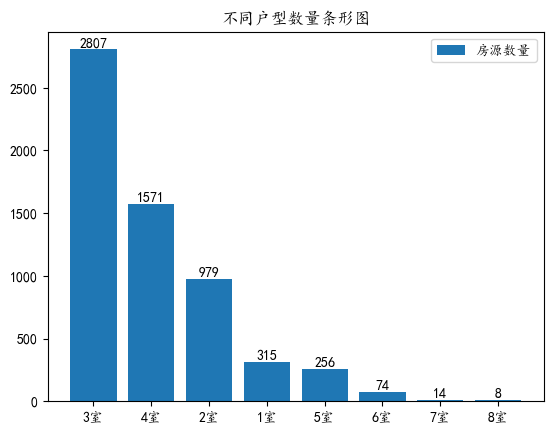

In [138]:
#户型
huxing=pd.DataFrame(huxing,columns=['户型','租房数','每平米租金'])
plt.bar(huxing['户型'],huxing['租房数'],label='房源数量')
for x, y in zip(huxing['户型'], huxing['租房数']):
    plt.text(x, y, y, ha='center', va='bottom', fontsize=10)
plt.legend()
plt.title('不同户型数量条形图')

从户型的房源数量来看，3室户型的租房数量最多，其次是4室户型，但从前面可知平均租房面积只有15.68平米，可见大多数房源都是采用合租的形式，毕竟房租太贵，且在北京生活成本太高。

Text(0.5, 1.0, '电梯房类型数量占比')

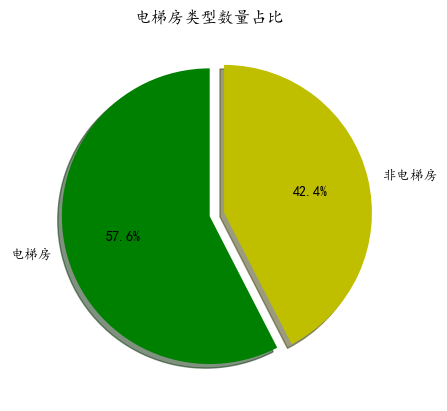

In [179]:
#电梯
dianti=pd.DataFrame(dianti,columns=['类型','租房数','每平米租金'])
plt.pie(dianti['租房数'],labels=dianti['类型'],colors=['g','y'],startangle=90,shadow= True,explode=(0,0.1),autopct='%1.1f%%')
plt.title('电梯房类型数量占比')

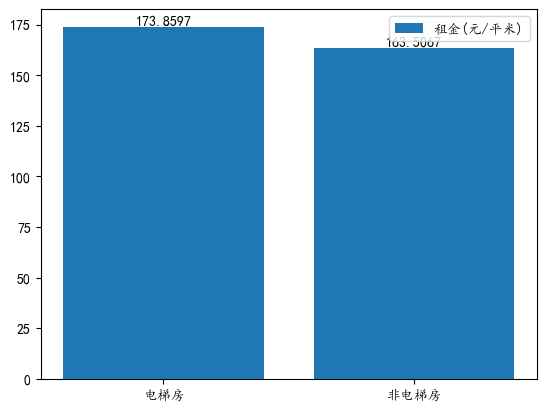

In [181]:
plt.bar(dianti['类型'],dianti['每平米租金'],label='租金(元/平米)')
for x, y in zip(dianti['类型'],dianti['每平米租金']):
    plt.text(x, y, y, ha='center', va='bottom', fontsize=10)
plt.legend()

从电梯房类型来看，电梯房数量比非电梯房数量更多，并且电梯房房租每平米比非电梯房贵10元左右。

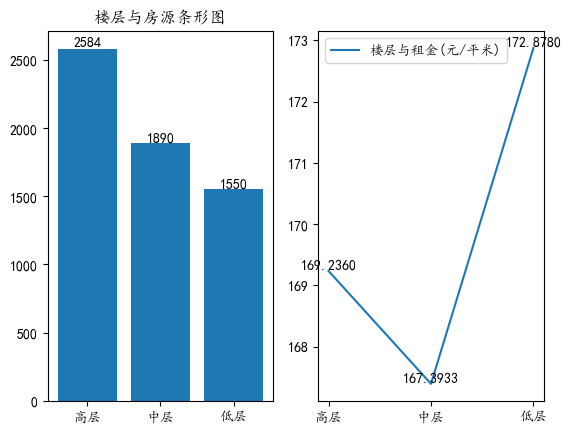

In [177]:
#楼层
louceng=pd.DataFrame(louceng,columns=['楼层','租房数','每平米租金'])
plt.figure()
plt.subplot(121)
plt.bar(louceng['楼层'],louceng['租房数'])
plt.title('楼层与房源条形图')
for x, y in zip(louceng['楼层'],louceng['租房数']):
    plt.text(x, y, y, ha='center', va='bottom', fontsize=10)
plt.subplot(122)
plt.plot(louceng['楼层'],louceng['每平米租金'],label='楼层与租金(元/平米)')
for x, y in zip(louceng['楼层'],louceng['每平米租金']):
    plt.text(x, y, y, ha='center', va='bottom', fontsize=10)
plt.legend()

高层房源最多，低层房源最少，从租金上看，不管是电梯房还是非电梯房，低楼层的租金都会稍贵一些，可能是因为低楼层出行较为方便，且北京地处北方，天气较为干燥，空气质量不是很好，所以可能北方人多会选择租低楼层，所以低楼层价格稍贵一些。

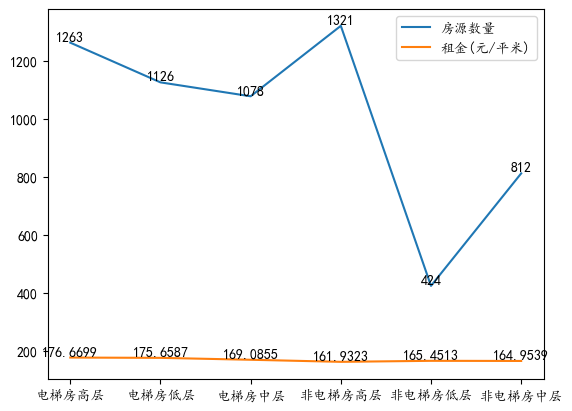

In [189]:
#电梯楼层
ticeng=pd.DataFrame(ticeng,columns=['类型','楼层','租房数','每平米租金'])
ticeng['电梯楼层']=ticeng['类型']+ticeng['楼层']
plt.figure()
plt.plot(ticeng['电梯楼层'],ticeng['租房数'],label='房源数量')
for x, y in zip(ticeng['电梯楼层'],ticeng['租房数']):
    plt.text(x, y, y, ha='center', va='bottom', fontsize=10)
plt.legend()
plt.plot(ticeng['电梯楼层'],ticeng['每平米租金'],label='租金(元/平米)')
for x, y in zip(ticeng['电梯楼层'],ticeng['每平米租金']):
    plt.text(x, y, y, ha='center', va='bottom', fontsize=10)
plt.legend()

从房源数量来看，非电梯房的高层房源最多，非电梯房低层房源最少，说明非电梯房的高层房源不容易租出去，从租金也可体现这一点，非电梯房高层的租金最便宜。

5.1 交通分析

In [194]:
#地铁数
sql="""
select 地铁数, count(1) as total, sum(价格)/sum(面积) as 每平米租金
from bj_rent
group by 地铁数
"""
cur=conn.cursor()
cur.execute(sql)
ditie=cur.fetchall()
ditie

((1, 4696, Decimal('164.4822')),
 (2, 1180, Decimal('185.6244')),
 (3, 136, Decimal('192.0878')),
 (0, 11, Decimal('123.9109')),
 (4, 1, Decimal('488.3333')))

租房周围地铁数量为1的房源最多，地铁数为4的房源最少，租房价格与地铁数量也有一定关系，地铁数量越多的房源，交通越便利，所以房租相对也更贵。

In [198]:
#距离地铁路程
sql="""
select case when 距离地铁路程 between 0 and 500 then '500米以内'
when 距离地铁路程 between 501 and 1000 then '1公里以内'
when 距离地铁路程 between 1001 and 1500 then '1.5公里以内'
else '1.5公里以外' end as ds,
      count(1) as total, sum(价格)/sum(面积) as per
from bj_rent
group by case when 距离地铁路程 between 0 and 500 then '500米以内'
when 距离地铁路程 between 501 and 1000 then '1公里以内'
 when 距离地铁路程 between 1001 and 1500 then '1.5公里以内'
else '1.5公里以外' end
"""
cur=conn.cursor()
cur.execute(sql)
juli=cur.fetchall()
juli

(('1公里以内', 2498, Decimal('169.9117')),
 ('500米以内', 1610, Decimal('181.1004')),
 ('1.5公里以内', 967, Decimal('162.1476')),
 ('1.5公里以外', 949, Decimal('154.4271')))

距离地铁站1公里的房源数量最多，1.5公里以外的房源数量最少，且租房价格与距离地铁站路程长短有一定的关系，距离较远的租房价格相对便宜一点。

5.2 交通分析可视化

Text(0.5, 1.0, '地铁距离与租金关系图')

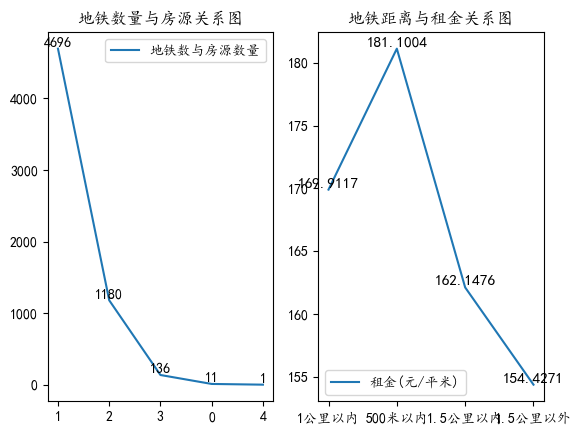

In [208]:
ditie=pd.DataFrame(ditie,columns=['地铁数','租房数','每平米租金'])
ditie['地铁数'] = ditie['地铁数'].astype(str)
juli=pd.DataFrame(juli,columns=['距离','租房数','每平米租金'])
plt.subplot(121)
plt.plot(ditie['地铁数'], ditie['租房数'], label='地铁数与房源数量')
for x, y in zip(ditie['地铁数'], ditie['租房数']):
    plt.text(x, y, y, ha='center', va='bottom', fontsize=10)
plt.legend()
plt.title('地铁数量与房源关系图')
plt.subplot(122)
plt.plot(juli['距离'],juli['每平米租金'], label='租金(元/平米)')
for x, y in zip(juli['距离'],juli['每平米租金']):
    plt.text(x, y, y, ha='center', va='bottom', fontsize=11)
plt.legend()
plt.title('地铁距离与租金关系图')

从地理位置上看，地铁数量越多，距离地铁位置越近的房源，即交通越便利的地方，租金也越贵，这也符合我们一般认知。

# 总结

1.数据预处理

首先用python对数据进行预处理，删除掉重复值，对缺失值进行处理，再对数据进行清洗，增加相应的列，将数据类型进行转换，再将处理好的6024条数据进行保存。

2.基于sql语句进行数据分析

基于sql对数据进行五个方面分析，分别为整体分析、地区分析、小区分析、户型楼层分析、交通分析，然后基于python,对分析处理好的数据进行可视化，便于观测。

3.分析结果

从整体来看，一共有6024条租房数据，其中平均租房面积为15.68平方米，每平米租房价格为169.58元，平均楼层为7楼，距离最近地铁的平均距离为961.74米。

从地区来看，朝阳区的租房数量最多，通州区的租房数量紧随其后，门头沟区租房数量最少,说明朝阳区和通州区的租赁市场比较活跃，人员流动和人口密度也比较大，且海淀区租房价格最贵，房山区的价格最便宜。

从小区来看，在海淀区的半壁街南路1号院小区最贵，达到596元每平米，是北京平均每平米租房价格169.58元的3倍多。在前10名小区中，海淀区、朝阳区的小区最多，也与上面分析海淀区、朝阳区房租最贵的结果相一致。

从户型楼层分析，3室的户型房源数量最多，其次是4室户型，但从前面可知平均租房面积只有15.68平米，可见大多数房源都是采用合租的形式，毕竟房租太贵，且在北京生活成本太高。电梯房中，高层房源最多，价格也最贵，中层房源最少，价格也最便宜；非电梯房中，高层房源最多，价格最便宜，低层房源最少，价格最贵。不管是电梯房还是非电梯房，低楼层的租金都会稍贵一些，这可能是因为低楼层出行更为方便，北京地处北方，空气干燥，所以人们多会选择住低楼层。

从交通状况来看，不管是房源数量，还是房租价格，交通越便利的地方，房源数量越多，租房价格也更高，这也符合我们的认知。